We can start by importing the required Modules for doing Multiple Regression Problem

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

We'll be using the same dataset that we used for Simple Linear Regression

### Dataset Credits: Coursera

In [134]:
dataset = "d:\\course-ML-with-Python-IBM\\Multiple Linear Regression\\dataset\\FuelConsumptionCo2.csv"
df = pd.read_csv(dataset)

In [135]:
#Verifying if Dataset is loaded.

df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
492,2014,HONDA,CR-V,SUV - SMALL,2.4,4,A5,X,10.3,7.6,9.1,31,209
951,2014,SUBARU,IMPREZA WAGON AWD,STATION WAGON - SMALL,2.0,4,AV,X,8.7,6.6,7.8,36,179
161,2014,CADILLAC,ATS AWD,COMPACT,3.6,6,AS6,X,13.1,9.0,11.3,25,260
168,2014,CADILLAC,CTS SEDAN Vsport,MID-SIZE,3.6,6,AS8,Z,15.1,9.9,12.8,22,294
631,2014,KIA,SPORTAGE AWD,SUV - SMALL,2.0,4,A6,X,12.7,9.7,11.4,25,262


Now that we have verified that the dataset has been loaded, let's see the summary of the dataset.

In [136]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [137]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


We notice that not all columns are included in the summary above. That's becuase, they are not numeric. In our case, those missing features are not required. Now, we can drop features(Columns) that are not required for us.

In [138]:
df = df.drop(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE'],axis=1)

Now that we have removed unwanted features, we can check the correlation between features. This will give us the pair-wise understanding of the relationship between features.

In [139]:
df.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


While we look at the last row (The row that shows the correlation for Co2 emissions), we notice that all the features have high correlation with the target. This shows that all these features are good candidates. 

Now, let's take a look at individual pairs.

Engine  Size and Cylinders are highly correlated. So, we must remove one to prevent multi-collinearity. Among Engine Size and Cylinders, Engine Size has high correlation with Co2 Emissions. So, we can drop Cylinders.

Similarly, we have 4 different fuel metrics. Among them, FUELCONSUMPTION_COMB_MPG has the highest correlation with Co2 emissions. So, we can keep it and drop the other fuel metric features.

In [140]:
df = df.drop(['CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB'], axis=1)

In [141]:
df.head()

,ENGINESIZE,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,33,196
1,2.4,29,221
2,1.5,48,136
3,3.5,25,255
4,3.5,27,244


Now, we have reduced the features to 2:1. Now, we need to be sure about selecting non redundant predictive features. For getting assistance in this, we can use scatter_matrix (from pandas.plotting).

### Explanation Credits: ChatGPT
A scatter matrix (also called a scatterplot matrix) is a grid of scatter plots that lets you visualize pairwise relationships between multiple numerical variables in a dataset. It's super useful for exploratory data analysis (EDA), especially when you're trying to:

    1. Understand the relationships (correlation) between features

    2. Detect linear or nonlinear patterns

    3. Spot clusters or outliers

    4. Get a feel for the data distribution


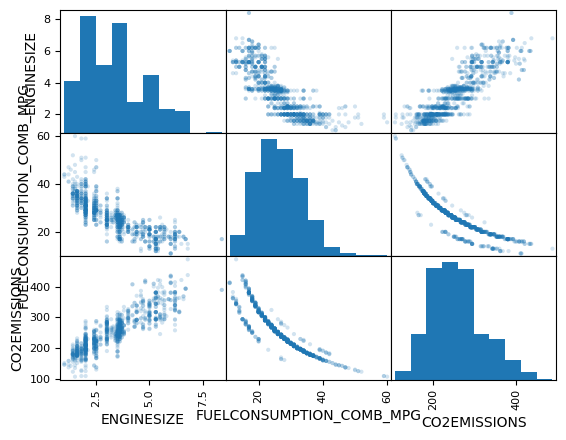

In [142]:
axs = pd.plotting.scatter_matrix(df,alpha=0.2)

We see the the label's are not oriented correctly. We can correct it manually by the following.

The scatter_matrix function returns an NumPy array (n- Square Matrix) with the plots (axes) as the elements. We can iteratively modify the label properties of each element manually as follows.

In [143]:
# Checking the type of axs (return value of scatter_matrix)
print(type(axs))
print(axs, end='\n'*5)   #3*3 Matrix.....
print(axs.flatten()) #we are converting it into an 1D array 

<class 'numpy.ndarray'>
[[<Axes: xlabel='ENGINESIZE', ylabel='ENGINESIZE'>
  <Axes: xlabel='FUELCONSUMPTION_COMB_MPG', ylabel='ENGINESIZE'>
  <Axes: xlabel='CO2EMISSIONS', ylabel='ENGINESIZE'>]
 [<Axes: xlabel='ENGINESIZE', ylabel='FUELCONSUMPTION_COMB_MPG'>
  <Axes: xlabel='FUELCONSUMPTION_COMB_MPG', ylabel='FUELCONSUMPTION_COMB_MPG'>
  <Axes: xlabel='CO2EMISSIONS', ylabel='FUELCONSUMPTION_COMB_MPG'>]
 [<Axes: xlabel='ENGINESIZE', ylabel='CO2EMISSIONS'>
  <Axes: xlabel='FUELCONSUMPTION_COMB_MPG', ylabel='CO2EMISSIONS'>
  <Axes: xlabel='CO2EMISSIONS', ylabel='CO2EMISSIONS'>]]




[<Axes: xlabel='ENGINESIZE', ylabel='ENGINESIZE'>
 <Axes: xlabel='FUELCONSUMPTION_COMB_MPG', ylabel='ENGINESIZE'>
 <Axes: xlabel='CO2EMISSIONS', ylabel='ENGINESIZE'>
 <Axes: xlabel='ENGINESIZE', ylabel='FUELCONSUMPTION_COMB_MPG'>
 <Axes: xlabel='FUELCONSUMPTION_COMB_MPG', ylabel='FUELCONSUMPTION_COMB_MPG'>
 <Axes: xlabel='CO2EMISSIONS', ylabel='FUELCONSUMPTION_COMB_MPG'>
 <Axes: xlabel='ENGINESIZE', ylabel='CO

In [144]:
#We can see above that is just an array with the axes. Now, we can modify the label properties below.
for axes in axs.flatten():      #For each axes in the flattened matrix
    axes.yaxis.label.set_rotation(0)
    axes.xaxis.label.set_rotation(90)
    axes.xaxis.label.set_ha('right')
print(axs)

[[<Axes: xlabel='ENGINESIZE', ylabel='ENGINESIZE'>
  <Axes: xlabel='FUELCONSUMPTION_COMB_MPG', ylabel='ENGINESIZE'>
  <Axes: xlabel='CO2EMISSIONS', ylabel='ENGINESIZE'>]
 [<Axes: xlabel='ENGINESIZE', ylabel='FUELCONSUMPTION_COMB_MPG'>
  <Axes: xlabel='FUELCONSUMPTION_COMB_MPG', ylabel='FUELCONSUMPTION_COMB_MPG'>
  <Axes: xlabel='CO2EMISSIONS', ylabel='FUELCONSUMPTION_COMB_MPG'>]
 [<Axes: xlabel='ENGINESIZE', ylabel='CO2EMISSIONS'>
  <Axes: xlabel='FUELCONSUMPTION_COMB_MPG', ylabel='CO2EMISSIONS'>
  <Axes: xlabel='CO2EMISSIONS', ylabel='CO2EMISSIONS'>]]


Segmenting the process into multiple cells won't work it seems. So, we can try the below method to acheive it.

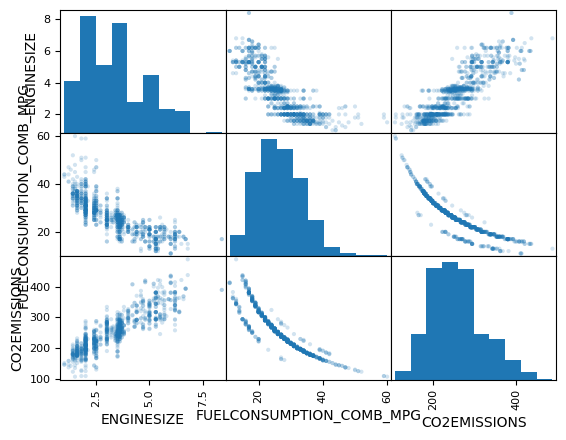

In [145]:
axs = pd.plotting.scatter_matrix(df, alpha=0.2)
fig = plt.gcf() #Capturing the current fig using plt.gcf() function.  [stands for "Get Current Figure"]

In [146]:
for axes in axs.flatten():
    axes.yaxis.label.set_rotation(0)
    axes.xaxis.label.set_rotation(90)

In [147]:
fig.tight_layout()
plt.show()

This approach failed too. Since we understood the process already, we won't need step by step explanation. hence, we can do the whole thing in a single cell.

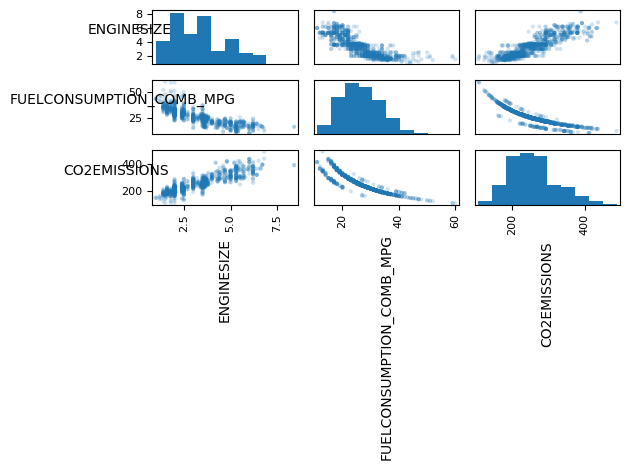

In [148]:
axs = pd.plotting.scatter_matrix(df, alpha=0.2)

for axes in axs.flatten():
    axes.yaxis.label.set_rotation(0)
    axes.xaxis.label.set_rotation(90)

plt.tight_layout()
plt.show()

Now, we have fixed the orientation of texts, but the spacing is not fixed. Let's do it below

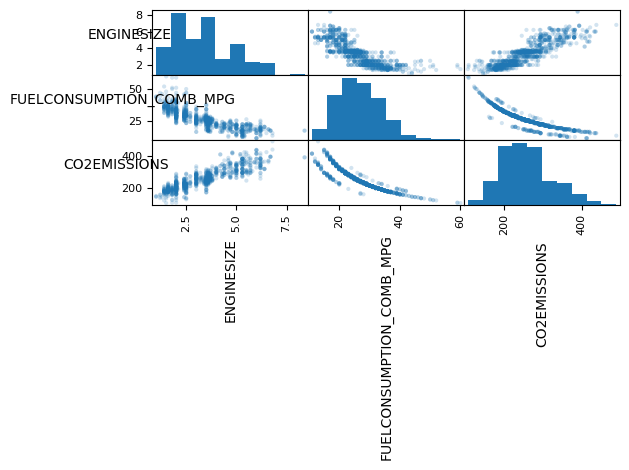

In [149]:
axs = pd.plotting.scatter_matrix(df, alpha=0.2)     #Getting the Scatter Matrix

"""
The scatter_matrix function returns a NDArray. (n-Square Matrix)
We need to modify the label properties to enhance readablity (Check above)
The array is nested, so we use flatten function.
Then we set rotations for each.
Then we set tight_layout.
Then, we get the current figure and remove the width spaces and horizontal spaces for better visuals.
"""

for axes in axs.flatten():
    axes.yaxis.label.set_rotation(0)
    axes.xaxis.label.set_rotation(90)

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

In the above figure, we have almost fixed all our problems. But, in the Y- Axis, the labels are overlapping with the figure. So, we need to set alignment for it. We can do it as follows.

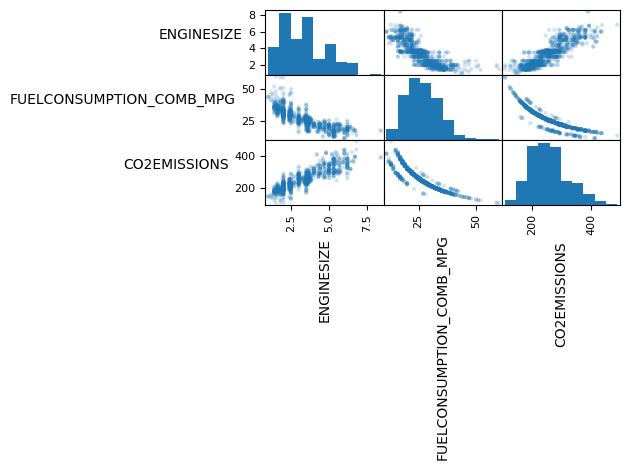

In [150]:
axs = pd.plotting.scatter_matrix(df, alpha=0.2)

for axes in axs.flatten():
    axes.xaxis.label.set_rotation(90)
    axes.yaxis.label.set_rotation(0)
    axes.yaxis.label.set_ha('right')  #Setting horizontal alignment as right for label in Y Axis

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()
    

There are some non-linearity in the FuelConsumption vs. Emissions. But we'll disregard that for now. We'll go on and train our model. 

### Data Extraction

In [151]:
X = df.iloc[:,[0,1]].to_numpy()
y = df.iloc[:, [2]].to_numpy() #The 2 inside [] ensures that the output is a DataFrame (2D) instead of a Series(1D)

In [152]:
df.describe() 

,ENGINESIZE,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000
mean,3.346298,26.441425,256.228679
std,1.415895,7.468702,63.372304
min,1.000000,11.000000,108.000000
25%,2.000000,21.000000,207.000000
50%,3.400000,26.000000,251.000000
75%,4.300000,31.000000,294.000000
max,8.400000,60.000000,488.000000


Here, we cam see that the independent variables (X) (Enginesize and FuelConsumption) are of different range. This difference in range could bring in biased results for large magnitude. Hence, it's a good practice to Scale the data. This can be down using the StandardScaler in sklearn.preprocessing. 

In [153]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)

In [154]:
pd.DataFrame(X).describe().round(2)

,0,1
count,1067.00,1067.00
mean,0.00,-0.00
std,1.00,1.00
min,-1.66,-2.07
25%,-0.95,-0.73
50%,0.04,-0.06
75%,0.67,0.61
max,3.57,4.50


After scaling, we can see that the SD is 1 and the mean is 0. 

In [155]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

Now, we have scaled and split our data. Now, we can build our Multiple Regression Model and train it with the processed data.

In [156]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [157]:
model.fit(X_train, y_train)

LinearRegression()

Now that we have trained our model. We can plot the line of best fit against the actual values.

In [158]:
#Extracting Line Details

intercept = model.intercept_
slopes = model.coef_

Since this is a Multiple Regression with 2 independent variables, we'll have a 3D plot. It's much more complex than a 2D plot. First, we need to seperate the  Independent features for plotting.

In [159]:
# First step is to extract features

x1 = X_train[:,0]
x2 = X_train[:,1]
y_plt = y_train

In [160]:
# Creating grid for the plane

x1_range = np.linspace(x1.min(), x1.max(),  20)
x2_range = np.linspace(x2.min(), x2.max(),  20)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

In [161]:
x_grid = np.c_[x1_grid.ravel(), x2_grid.ravel()]
y_pred = model.predict(x_grid).reshape(x1_grid.shape)

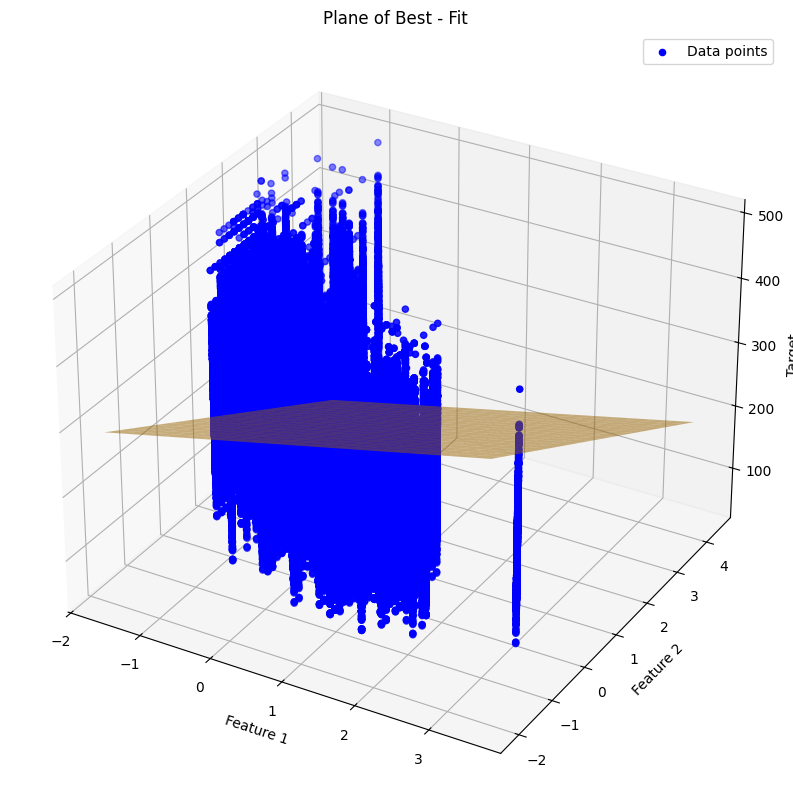

In [162]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(x1, x2, y, color = 'blue', label = 'Data points')
ax.plot_surface(x1_grid, x2_grid, y_pred, alpha = 0.5, color = 'orange')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')
ax.set_title("Plane of Best - Fit")

plt.legend()
plt.show()


We have somehow created a 3D plot. It's pretty hard to visualize with a 3D scatter plot. Now, we can plot it as 2D with just one feature too.

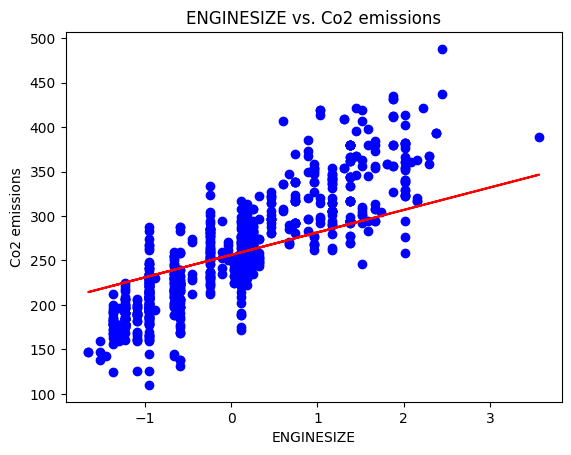

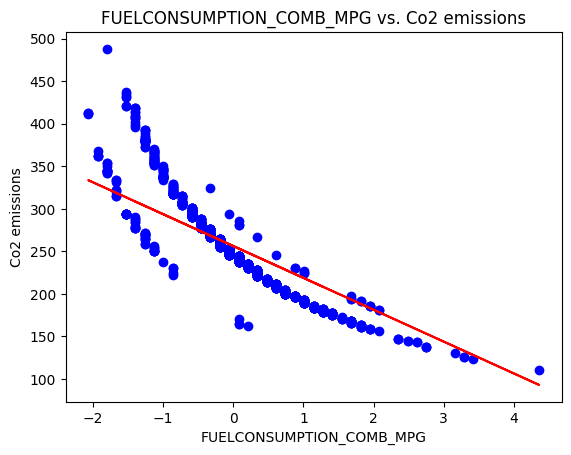

In [163]:
features = df.columns
for feature in range(X_train.shape[-1]):
    x_loc = X_train[:,feature]
    plt.scatter(x_loc, y_train, c = "b")
    plt.plot(x_loc, intercept + x_loc * slopes[0, feature], c = 'r')
    plt.xlabel(features[feature])
    plt.ylabel("Co2 emissions")
    plt.title(f"{features[feature]} vs. Co2 emissions")
    plt.show()

Now, we can make our model predict the test values.

In [164]:
y_pred = model.predict(X_test)

Now we can assess the performance of our model.

In [165]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

print(f"Mean Absolute Error : {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error : {mean_squared_error(y_test, y_pred)}")
print(f"Root Mean Squared Error : {root_mean_squared_error(y_test, y_pred)}")
print(f"R2 Score : {r2_score(y_test, y_pred)}")

Mean Absolute Error : 14.285849104574153
Mean Squared Error : 466.1131199661167
Root Mean Squared Error : 21.589653076557685
R2 Score : 0.8872746641384827


Our model's performance is not that bad. An r2 score of .88 is Pretty Good.

Hence, we have successfully trained our Mutiple Regression Model.